## Regresion lineal simple para DF_Mexico.csv

### 1. Importar Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Colores de texto
ROJO = "\033[31m"
VERDE = "\033[32m"
AMARILLO = "\033[33m"
AZUL = "\033[34m"
MAGENTA = "\033[35m"
CIAN = "\033[36m"

# Restaurar color predeterminado
RESET = "\033[0m"

### 2. Cargar archivo

In [ ]:
df = pd.read_csv("DF_Mexico.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [ ]:
df1 = df.copy()
# Seleccionamos columnas a analizar
df1 = df1.iloc[:, [16, 17, 22, 23, 40, 41, 42, 51, 52, 53, 54, 56, 57, 58, 63, 65, 66, 70, 71, 72, 73, 74]]
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100%,NaN,3,7,"$1,434.00",1,1125,0,19,49,...,0,0,4.95,4.95,5.00,3,3,0,0,0.19
1,NaN,NaN,3,3,$830.00,3,1125,11,41,71,...,1,0,4.88,5.00,4.95,2,2,0,0,0.54
2,100%,90%,4,4,"$1,469.00",24,1125,0,0,0,...,2,0,4.71,4.92,4.58,3,3,0,0,0.31
3,NaN,NaN,1,1,"$3,658.00",1,7,28,58,88,...,0,0,NaN,NaN,NaN,1,1,0,0,NaN
4,100%,86%,16,16,"$18,000.00",1,365,30,59,89,...,12,1,4.70,4.78,4.98,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,100%,100%,3,4,$760.00,3,365,17,47,77,...,0,0,NaN,NaN,NaN,2,2,0,0,NaN
24220,NaN,NaN,1,1,"$1,520.00",1,365,30,60,90,...,0,0,NaN,NaN,NaN,1,1,0,0,NaN
24221,NaN,96%,1,6,$533.00,5,365,29,32,32,...,0,0,NaN,NaN,NaN,1,0,1,0,NaN
24222,100%,100%,13,13,"$1,200.00",1,365,9,39,69,...,0,0,NaN,NaN,NaN,13,13,0,0,NaN


### 3. Limpieza del DF y Outliers

#### 3.1 Verificamos info del DF

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            21133 non-null  object 
 1   host_acceptance_rate                          22181 non-null  object 
 2   host_listings_count                           24224 non-null  int64  
 3   host_total_listings_count                     24224 non-null  int64  
 4   price                                         24224 non-null  object 
 5   minimum_nights                                24224 non-null  int64  
 6   maximum_nights                                24224 non-null  int64  
 7   availability_30                               24224 non-null  int64  
 8   availability_60                               24224 non-null  int64  
 9   availability_90                               24224 non-null 

In [ ]:
# Convertimos todas las columnas a tipo float
df1['price'] = pd.to_numeric(df1['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.rstrip('%').astype(float) / 100
df1['host_response_rate'] = df1['host_response_rate'].str.rstrip('%').astype(float) / 100

display(df1)


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,NaN,3,7,1434.0,1,1125,0,19,49,...,0,0,4.95,4.95,5.00,3,3,0,0,0.19
1,NaN,NaN,3,3,830.0,3,1125,11,41,71,...,1,0,4.88,5.00,4.95,2,2,0,0,0.54
2,1.0,0.90,4,4,1469.0,24,1125,0,0,0,...,2,0,4.71,4.92,4.58,3,3,0,0,0.31
3,NaN,NaN,1,1,3658.0,1,7,28,58,88,...,0,0,NaN,NaN,NaN,1,1,0,0,NaN
4,1.0,0.86,16,16,18000.0,1,365,30,59,89,...,12,1,4.70,4.78,4.98,12,3,2,0,0.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,1.0,1.00,3,4,760.0,3,365,17,47,77,...,0,0,NaN,NaN,NaN,2,2,0,0,NaN
24220,NaN,NaN,1,1,1520.0,1,365,30,60,90,...,0,0,NaN,NaN,NaN,1,1,0,0,NaN
24221,NaN,0.96,1,6,533.0,5,365,29,32,32,...,0,0,NaN,NaN,NaN,1,0,1,0,NaN
24222,1.0,1.00,13,13,1200.0,1,365,9,39,69,...,0,0,NaN,NaN,NaN,13,13,0,0,NaN


#### 3.2 Verificar la existencia valores nulos

In [ ]:
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              3091
host_acceptance_rate                            2043
host_listings_count                                0
host_total_listings_count                          0
price                                              0
minimum_nights                                     0
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                             0
review_scores_cleanliness                       3651
review_scores_communication                     3652
review_scores_location                          3653
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes   

#### 3.3 Eliminar valores nulos en el DF

In [ ]:
df1 = df1.dropna()
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,1.0,0.90,4,4,1469.0,24,1125,0,0,0,...,2,0,4.71,4.92,4.58,3,3,0,0,0.31
4,1.0,0.86,16,16,18000.0,1,365,30,59,89,...,12,1,4.70,4.78,4.98,12,3,2,0,0.46
5,1.0,0.70,1,2,2561.0,2,30,2,13,19,...,16,1,4.71,4.85,5.00,1,1,0,0,0.70
6,1.0,0.95,2,6,650.0,3,250,0,0,0,...,15,0,4.88,4.94,4.75,1,1,0,0,0.58
7,1.0,1.00,2,3,1089.0,2,1125,18,48,78,...,6,0,4.90,4.95,4.94,2,0,2,0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,1.0,0.93,2,2,1800.0,2,365,4,18,48,...,1,1,5.00,5.00,5.00,1,1,0,0,1.00
24058,1.0,0.54,3,3,925.0,1,365,30,60,90,...,1,1,5.00,5.00,5.00,3,1,2,0,1.00
24109,1.0,1.00,1,1,750.0,1,365,24,54,84,...,1,1,5.00,5.00,5.00,1,1,0,0,1.00
24127,1.0,0.88,1,2,250.0,1,365,24,54,84,...,1,1,5.00,5.00,5.00,1,0,1,0,1.00


In [ ]:
# Corroboramos valores nulos
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_cleanliness                       0
review_scores_communication                     0
review_scores_location                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0


#### 3.4 Mostrar la distribucion de valores atipicos

<Figure size 1500x800 with 0 Axes>

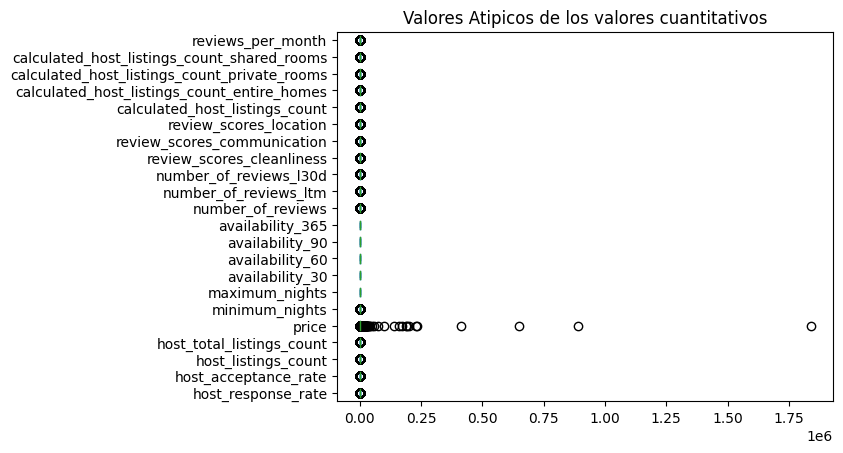

In [ ]:
fig = plt.figure(figsize = (15, 8))
df1.plot(kind='box', vert=False)
plt.title('Valores Atipicos de los valores cuantitativos')
plt.show()

#### 3.5 Metodo de Cuantiles

In [ ]:
# Encontramos los valores extremos
y = df1

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5 * iqr
limiteInferiorIQR = percentile25 - 1.5 * iqr


print(f"Limite superior permitido :")
for col, val in limiteSuperiorIQR.items():
    print(f"{col}: {round(val, 2)}")

print(f"\n\nLimite inferior permitido :")
for col, val in limiteInferiorIQR.items():
    print(f"{col}: {round(val, 2)}")

Limite superior permitido :
host_response_rate: 1.0
host_acceptance_rate: 1.06
host_listings_count: 29.5
host_total_listings_count: 37.0
price: 3034.5
minimum_nights: 3.5
maximum_nights: 2452.5
availability_30: 56.5
availability_60: 101.5
availability_90: 138.0
availability_365: 657.5
number_of_reviews: 126.0
number_of_reviews_ltm: 55.5
number_of_reviews_l30d: 5.0
review_scores_cleanliness: 5.45
review_scores_communication: 5.29
review_scores_location: 5.27
calculated_host_listings_count: 26.0
calculated_host_listings_count_entire_homes: 16.0
calculated_host_listings_count_private_rooms: 5.0
calculated_host_listings_count_shared_rooms: 0.0
reviews_per_month: 5.53


Limite inferior permitido :
host_response_rate: 1.0
host_acceptance_rate: 0.9
host_listings_count: -14.5
host_total_listings_count: -19.0
price: -897.5
minimum_nights: -0.5
maximum_nights: -1087.5
availability_30: -27.5
availability_60: -22.5
availability_90: -6.0
availability_365: -154.5
number_of_reviews: -66.0
number_of_r

####3.6 Encontrar los Outliers

In [ ]:
# Encontramos Outliers
outliers = df1[(y>limiteSuperiorIQR) | (y<limiteInferiorIQR)]
print(f"\nOutliers:\n")
for col, val in outliers.items():
    print(f"{col}: {round(val, 2)}")


Outliers:

host_response_rate: 2       NaN
4       NaN
5       NaN
6       NaN
7       NaN
         ..
24057   NaN
24058   NaN
24109   NaN
24127   NaN
24188   NaN
Name: host_response_rate, Length: 18531, dtype: float64
host_acceptance_rate: 2         NaN
4        0.86
5        0.70
6         NaN
7         NaN
         ... 
24057     NaN
24058    0.54
24109     NaN
24127    0.88
24188     NaN
Name: host_acceptance_rate, Length: 18531, dtype: float64
host_listings_count: 2       NaN
4       NaN
5       NaN
6       NaN
7       NaN
         ..
24057   NaN
24058   NaN
24109   NaN
24127   NaN
24188   NaN
Name: host_listings_count, Length: 18531, dtype: float64
host_total_listings_count: 2       NaN
4       NaN
5       NaN
6       NaN
7       NaN
         ..
24057   NaN
24058   NaN
24109   NaN
24127   NaN
24188   NaN
Name: host_total_listings_count, Length: 18531, dtype: float64
price: 2            NaN
4        18000.0
5            NaN
6            NaN
7            NaN
          ...   
24057

#### 3.7 Convertir Outliers en nulos

In [ ]:
df1 = df1[(y<=limiteSuperiorIQR) & (y>=limiteInferiorIQR)]
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2,1.0,0.90,4.0,4.0,1469.0,NaN,1125,0,0,0,...,2.0,0.0,4.71,4.92,4.58,3.0,3.0,0.0,0.0,0.31
4,1.0,NaN,16.0,16.0,NaN,1.0,365,30,59,89,...,12.0,1.0,4.70,4.78,4.98,12.0,3.0,2.0,0.0,0.46
5,1.0,NaN,1.0,2.0,2561.0,2.0,30,2,13,19,...,16.0,1.0,4.71,4.85,5.00,1.0,1.0,0.0,0.0,0.70
6,1.0,0.95,2.0,6.0,650.0,3.0,250,0,0,0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,1.0,1.00,2.0,3.0,1089.0,2.0,1125,18,48,78,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,1.0,0.93,2.0,2.0,1800.0,2.0,365,4,18,48,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24058,1.0,NaN,3.0,3.0,925.0,1.0,365,30,60,90,...,1.0,1.0,5.00,5.00,5.00,3.0,1.0,2.0,0.0,1.00
24109,1.0,1.00,1.0,1.0,750.0,1.0,365,24,54,84,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24127,1.0,NaN,1.0,2.0,250.0,1.0,365,24,54,84,...,1.0,1.0,5.00,5.00,5.00,1.0,0.0,1.0,0.0,1.00


In [ ]:
# Corroboramos valores nulos
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              4002
host_acceptance_rate                            2638
host_listings_count                             2747
host_total_listings_count                       2579
price                                           1207
minimum_nights                                  1877
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                               1646
number_of_reviews_ltm                            942
number_of_reviews_l30d                           766
review_scores_cleanliness                       1086
review_scores_communication                     1609
review_scores_location                          1429
calculated_host_listings_count                  2424
calculated_host_listings_count_entire_homes   

####3.8 Eliminamos todos los registros nulos

In [ ]:
#df1 = df1.fillna(round(df1.mean(), 1))
df1 = df1.dropna()
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,1.0,0.95,2.0,6.0,650.0,3.0,250,0,0,0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,1.0,1.00,2.0,3.0,1089.0,2.0,1125,18,48,78,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,1.0,1.00,13.0,14.0,943.0,2.0,60,25,42,66,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,1.0,0.99,14.0,14.0,1200.0,2.0,1125,1,1,28,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,1.0,1.00,3.0,3.0,549.0,1.0,90,11,31,61,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23974,1.0,1.00,3.0,3.0,656.0,2.0,365,9,25,55,...,1.0,1.0,5.00,5.00,5.00,3.0,3.0,0.0,0.0,1.00
23988,1.0,1.00,1.0,1.0,1114.0,1.0,1125,15,45,75,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24057,1.0,0.93,2.0,2.0,1800.0,2.0,365,4,18,48,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24109,1.0,1.00,1.0,1.0,750.0,1.0,365,24,54,84,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00


In [ ]:
# Corroboramos valores nulos
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_cleanliness                       0
review_scores_communication                     0
review_scores_location                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0


####3.9 Graficar el comportamiento de los valores atipicos



<Figure size 1500x800 with 0 Axes>

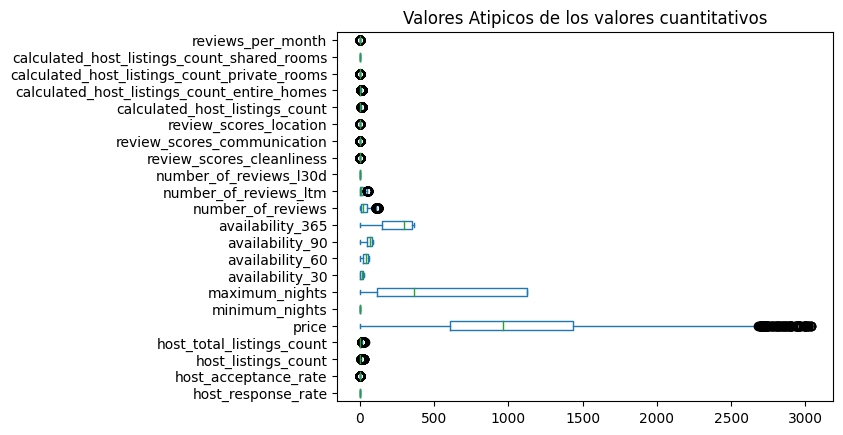

In [ ]:
# Corroboramos con boxplot la nueva distribucion de los valores atipicos
fig = plt.figure(figsize = (15, 8))
df1.plot(kind='box', vert=False)
plt.title('Valores Atipicos de los valores cuantitativos')
plt.show()

In [ ]:
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,1.0,0.95,2.0,6.0,650.0,3.0,250,0,0,0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,1.0,1.00,2.0,3.0,1089.0,2.0,1125,18,48,78,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,1.0,1.00,13.0,14.0,943.0,2.0,60,25,42,66,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,1.0,0.99,14.0,14.0,1200.0,2.0,1125,1,1,28,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,1.0,1.00,3.0,3.0,549.0,1.0,90,11,31,61,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23974,1.0,1.00,3.0,3.0,656.0,2.0,365,9,25,55,...,1.0,1.0,5.00,5.00,5.00,3.0,3.0,0.0,0.0,1.00
23988,1.0,1.00,1.0,1.0,1114.0,1.0,1125,15,45,75,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24057,1.0,0.93,2.0,2.0,1800.0,2.0,365,4,18,48,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
24109,1.0,1.00,1.0,1.0,750.0,1.0,365,24,54,84,...,1.0,1.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5945 entries, 6 to 24188
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            5945 non-null   float64
 1   host_acceptance_rate                          5945 non-null   float64
 2   host_listings_count                           5945 non-null   float64
 3   host_total_listings_count                     5945 non-null   float64
 4   price                                         5945 non-null   float64
 5   minimum_nights                                5945 non-null   float64
 6   maximum_nights                                5945 non-null   int64  
 7   availability_30                               5945 non-null   int64  
 8   availability_60                               5945 non-null   int64  
 9   availability_90                               5945 non-null   

### 4. Regresión lineal simple

Es posible calcular las correlaciones de todas las variables o columnas de manera inmediata para definir cuales son las mejores relaciones existentes

Primero muestro mis columnas existentes para revisar que todo este bien (tipo de datos)

In [ ]:
df1.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,1.0,0.95,2.0,6.0,650.0,3.0,250,0,0,0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,1.0,1.00,2.0,3.0,1089.0,2.0,1125,18,48,78,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,1.0,1.00,13.0,14.0,943.0,2.0,60,25,42,66,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,1.0,0.99,14.0,14.0,1200.0,2.0,1125,1,1,28,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,1.0,1.00,3.0,3.0,549.0,1.0,90,11,31,61,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


Al generar las correlaciones de is variables puedo observar algunos casos en los que las variables muestran NaN, es decir, que no existe una correlacion de algun tipo entre ambas variables, si no que son completamente ajenas.

En este caso no se puede tratar de un error por tipo de datos, ya que las variables con valores que no eran numericos fueron tratadas con anterioridad.

En base a la tabla de correlaciones elegiré 6 pares que cuenten con un R alto con el que pueda mostrar los modelos de regresion lineal de manera efectiva.

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df1.corr()
Corr_Factors
df1.info()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_response_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,1.000000,0.106323,0.090906,0.075558,-0.034007,0.040604,-0.003192,-0.000147,0.003543,...,0.074072,0.058863,-0.013738,-0.010589,-0.017566,0.112790,0.126420,-0.044846,NaN,0.104314
host_listings_count,NaN,0.106323,1.000000,0.914543,0.139106,-0.066043,-0.016628,0.028561,0.023530,0.015890,...,0.010011,-0.034760,-0.041356,-0.107925,-0.033365,0.878000,0.812756,0.132351,NaN,0.009061
host_total_listings_count,NaN,0.090906,0.914543,1.000000,0.136623,-0.048833,-0.009406,0.028492,0.022932,0.015002,...,0.007629,-0.040382,-0.047222,-0.114110,-0.019000,0.808163,0.753547,0.113234,NaN,-0.010680
price,NaN,0.075558,0.139106,0.136623,1.000000,0.027249,0.000138,0.018871,0.010733,0.010353,...,0.012174,0.002798,0.105195,0.040303,0.162082,0.114927,0.233212,-0.327986,NaN,0.057720
minimum_nights,NaN,-0.034007,-0.066043,-0.048833,0.027249,1.000000,0.023877,-0.119482,-0.094569,-0.079437,...,-0.030494,-0.024048,0.010185,0.025713,0.016111,-0.068047,0.001621,-0.148739,NaN,-0.124265
maximum_nights,NaN,0.040604,-0.016628,-0.009406,0.000138,0.023877,1.000000,-0.051378,-0.047130,-0.042381,...,0.050193,-0.026934,-0.063197,-0.067841,-0.065809,-0.010553,-0.001511,-0.021336,NaN,-0.069987
availability_30,NaN,-0.003192,0.028561,0.028492,0.018871,-0.119482,-0.051378,1.000000,0.902175,0.820000,...,-0.046393,0.057771,-0.013139,-0.048610,-0.026194,0.046489,-0.002835,0.111272,NaN,-0.007183
availability_60,NaN,-0.000147,0.023530,0.022932,0.010733,-0.094569,-0.047130,0.902175,1.000000,0.963240,...,0.011400,0.111028,-0.013862,-0.056941,-0.033745,0.047294,0.011283,0.080718,NaN,0.044213
availability_90,NaN,0.003543,0.015890,0.015002,0.010353,-0.079437,-0.042381,0.820000,0.963240,1.000000,...,0.043638,0.132103,-0.010965,-0.058559,-0.037314,0.043085,0.015772,0.059475,NaN,0.069306


###Creamos un diccionario donde almacenaremos los valores para el coeficiente de correlacion y determinacion de cada modelo obtenido para DF_Mexico.csv



In [ ]:
coeficientesMexico = {
    'host_total_listings_count vs host_listings_count': [],
    'calculated_host_listings_count vs host_listings_count': [],
    'calculated_host_listings_count_entire_homes vs host_listings_count': [],
    'calculated_host_listings_count_entire_homes vs host_total_listings_count': [],
    'availability_60 vs availability_90': [],
    'availability_60 vs availability_30': []
}

#### 4.1 host_total_listings_count vs host_listings_count
#####4.1.1 Mostrar correlacion de los datos


<Axes: xlabel='host_total_listings_count', ylabel='host_listings_count'>

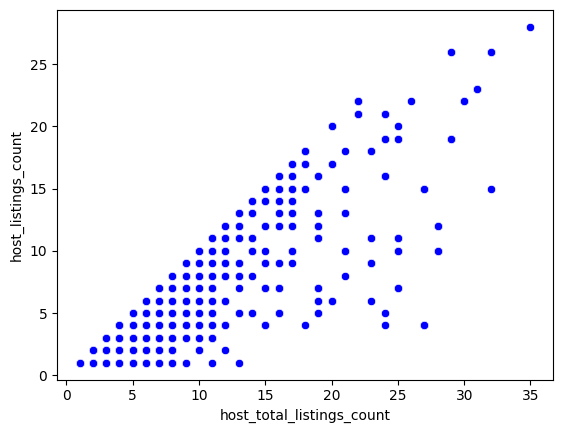

In [ ]:
sns.scatterplot(x="host_total_listings_count", y="host_listings_count", color="blue", data=df1)

#####4.1.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["host_total_listings_count"]]
Var_dep = df1[["host_listings_count"]]

#####4.1.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.1.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.1.3 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.72497255]]),
 'rank_': 1,
 'singular_': array([410.7454701]),
 'intercept_': array([0.45551317])}

#####4.1.4 Modelo matematico, y = 0.72497255 + 0.45551317

In [ ]:
yPred = model.predict(X = df1[["host_total_listings_count"]])
yPred

array([[ 4.80534848],
       [ 2.63043083],
       [10.6051289 ],
       ...,
       [ 1.90545827],
       [ 1.18048572],
       [ 9.1551838 ]])

#####4.1.5 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_host_total_listings_count", yPred)
df1.head()

,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,4.805348,1.0,0.95,2.0,6.0,650.0,3.0,250,0,0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,2.630431,1.0,1.00,2.0,3.0,1089.0,2.0,1125,18,48,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,10.605129,1.0,1.00,13.0,14.0,943.0,2.0,60,25,42,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,10.605129,1.0,0.99,14.0,14.0,1200.0,2.0,1125,1,1,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,2.630431,1.0,1.00,3.0,3.0,549.0,1.0,90,11,31,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


#####4.1.6 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='host_total_listings_count', ylabel='host_listings_count'>

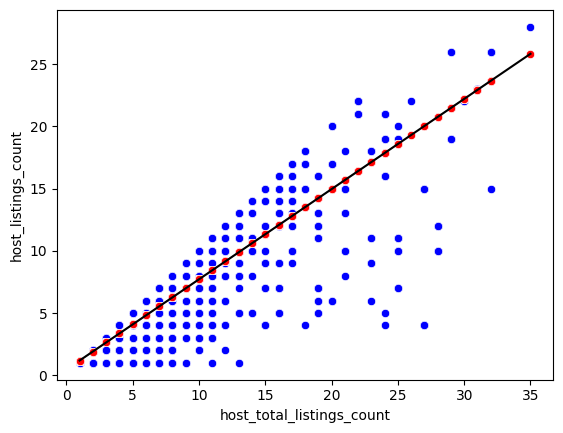

In [ ]:
sns.scatterplot(x='host_total_listings_count', y='host_listings_count', color='blue', data=df1)
sns.scatterplot(x='host_total_listings_count', y='predict_host_total_listings_count', color='red', data=df1)
sns.lineplot(x='host_total_listings_count', y='predict_host_total_listings_count', color='black', data=df1)

#####4.1.7 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.8363880365123116

####4.1.8  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9145425285421732

In [ ]:
coeficientesMexico["host_total_listings_count vs host_listings_count"].append(coef_Deter)
coeficientesMexico["host_total_listings_count vs host_listings_count"].append(coef_Correl)
coeficientesMexico["host_total_listings_count vs host_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesMexico["host_total_listings_count vs host_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesMexico["host_total_listings_count vs host_listings_count"])

[0.8363880365123116, 0.9145425285421732, 0.7249725525200057, 0.45551316897180616]


#### 4.2 calculated_host_listings_count vs host_listings_count
#####4.2.1 Mostrar correlacion de los datos


<Axes: xlabel='calculated_host_listings_count', ylabel='host_listings_count'>

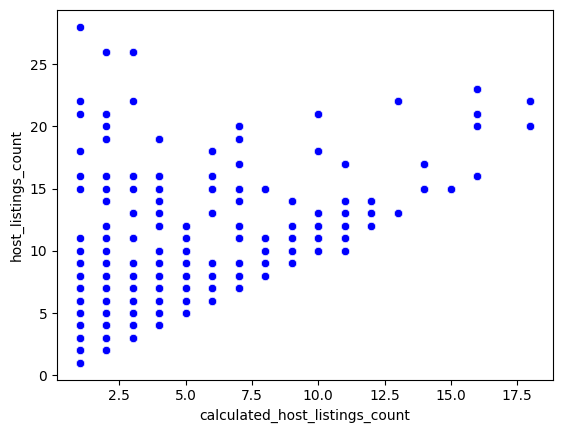

In [ ]:
sns.scatterplot(x="calculated_host_listings_count", y="host_listings_count", color="blue", data=df1)

#####4.2.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["calculated_host_listings_count"]]
Var_dep = df1[["host_listings_count"]]

#####4.2.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.2.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.2.3 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.08562486]]),
 'rank_': 1,
 'singular_': array([263.33279095]),
 'intercept_': array([0.41544383])}

#####4.2.4 Modelo matematico, y = 1.08562486 + 0.41544383

In [ ]:
yPred = model.predict(X = df1[["calculated_host_listings_count"]])
yPred

array([[ 1.50106869],
       [ 2.58669355],
       [14.528567  ],
       ...,
       [ 1.50106869],
       [ 1.50106869],
       [ 5.84356813]])

#####4.2.5 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_calculated_host_listings_count", yPred)
df1.head()

,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,1.501069,4.805348,1.0,0.95,2.0,6.0,650.0,3.0,250,0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,2.586694,2.630431,1.0,1.00,2.0,3.0,1089.0,2.0,1125,18,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,14.528567,10.605129,1.0,1.00,13.0,14.0,943.0,2.0,60,25,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,10.186068,10.605129,1.0,0.99,14.0,14.0,1200.0,2.0,1125,1,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,3.672318,2.630431,1.0,1.00,3.0,3.0,549.0,1.0,90,11,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


#####4.2.6 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='calculated_host_listings_count', ylabel='host_listings_count'>

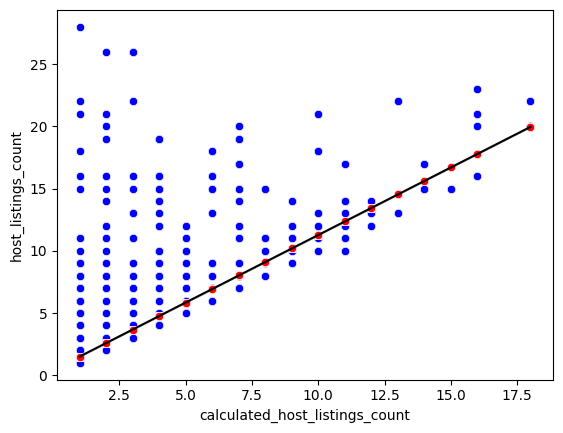

In [ ]:
sns.scatterplot(x='calculated_host_listings_count', y='host_listings_count', color='blue', data=df1)
sns.scatterplot(x='calculated_host_listings_count', y='predict_calculated_host_listings_count', color='red', data=df1)
sns.lineplot(x='calculated_host_listings_count', y='predict_calculated_host_listings_count', color='black', data=df1)

#####4.2.7 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.7708831650085042

####4.2.8  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.8779995244921857

In [ ]:
coeficientesMexico["calculated_host_listings_count vs host_listings_count"].append(coef_Deter)
coeficientesMexico["calculated_host_listings_count vs host_listings_count"].append(coef_Correl)
coeficientesMexico["calculated_host_listings_count vs host_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesMexico["calculated_host_listings_count vs host_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesMexico["calculated_host_listings_count vs host_listings_count"])

[0.7708831650085042, 0.8779995244921857, 1.0856248594788236, 0.4154438291946998]


#### 4.3 calculated_host_listings_count_entire_homes vs host_listings_count
#####4.3.1 Mostrar correlacion de los datos


<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='host_listings_count'>

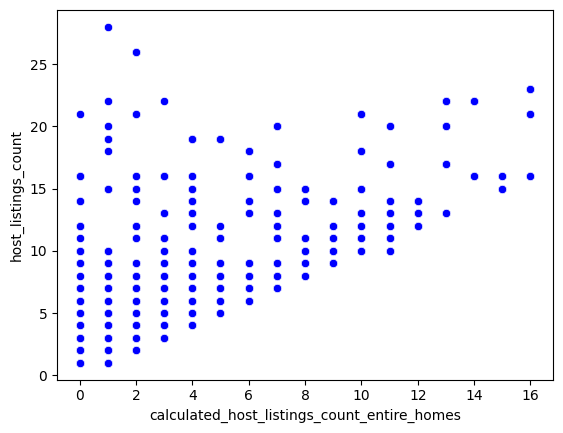

In [ ]:
sns.scatterplot(x="calculated_host_listings_count_entire_homes", y="host_listings_count", color="blue", data=df1)

#####4.3.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["calculated_host_listings_count_entire_homes"]]
Var_dep = df1[["host_listings_count"]]

#####4.3.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.3.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.3.3 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.00683553]]),
 'rank_': 1,
 'singular_': array([262.84045758]),
 'intercept_': array([1.50577373])}

#####4.3.4 Modelo matematico, y = 1.00683553 + 1.50577373

In [ ]:
yPred = model.predict(X = df1[["calculated_host_listings_count_entire_homes"]])
yPred

array([[ 2.51260927],
       [ 1.50577373],
       [12.58096462],
       ...,
       [ 2.51260927],
       [ 2.51260927],
       [ 6.53995141]])

#####4.3.5 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_calculated_host_listings_count_entire_homes", yPred)
df1.head()

,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,2.512609,1.501069,4.805348,1.0,0.95,2.0,6.0,650.0,3.0,250,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,1.505774,2.586694,2.630431,1.0,1.00,2.0,3.0,1089.0,2.0,1125,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,12.580965,14.528567,10.605129,1.0,1.00,13.0,14.0,943.0,2.0,60,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,10.567294,10.186068,10.605129,1.0,0.99,14.0,14.0,1200.0,2.0,1125,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,1.505774,3.672318,2.630431,1.0,1.00,3.0,3.0,549.0,1.0,90,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


#####4.3.6 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='host_listings_count'>

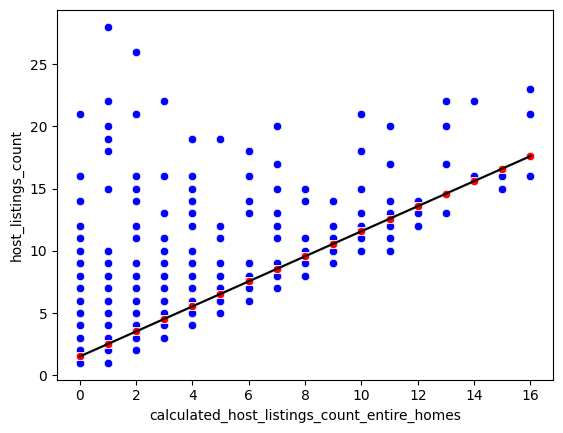

In [ ]:
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='host_listings_count', color='blue', data=df1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='predict_calculated_host_listings_count_entire_homes', color='red', data=df1)
sns.lineplot(x='calculated_host_listings_count_entire_homes', y='predict_calculated_host_listings_count_entire_homes', color='black', data=df1)

#####4.3.7 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.6605726936143884

####4.3.8  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.8127562325903065

In [ ]:
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_listings_count"].append(coef_Deter)
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_listings_count"].append(coef_Correl)
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesMexico["calculated_host_listings_count_entire_homes vs host_listings_count"])

[0.6605726936143884, 0.8127562325903065, 1.0068355347209166, 1.5057737344606004]


#### 4.4 host_total_listings_count vs calculated_host_listings_count_entire_homes
#####4.4.1 Mostrar correlacion de los datos


<Axes: xlabel='host_total_listings_count', ylabel='calculated_host_listings_count_entire_homes'>

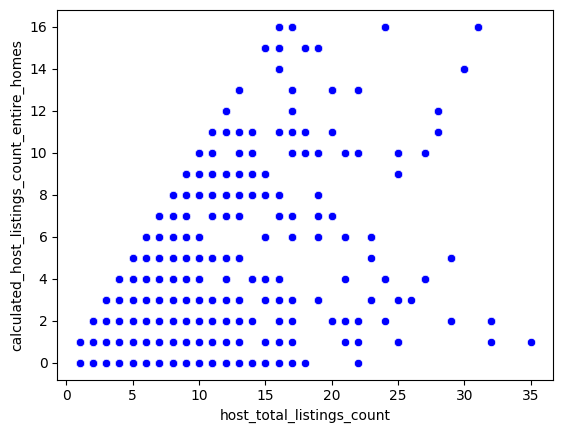

In [ ]:
sns.scatterplot(x="host_total_listings_count", y="calculated_host_listings_count_entire_homes", color="blue", data=df1)

#####4.4.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["host_total_listings_count"]]
Var_dep = df1[["calculated_host_listings_count_entire_homes"]]

#####4.4.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.4.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.4.5 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.48220309]]),
 'rank_': 1,
 'singular_': array([410.7454701]),
 'intercept_': array([0.1969976])}

#####4.4.6 Modelo matematico, y = 0.48220309 + 0.1969976

In [ ]:
yPred = model.predict(X = df1[["host_total_listings_count"]])
yPred

array([[3.09021616],
       [1.64360688],
       [6.9478409 ],
       ...,
       [1.16140379],
       [0.67920069],
       [5.98343471]])

#####4.4.7 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_host_total_listings_count2", yPred)
df1.head()

,predict_host_total_listings_count2,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,3.090216,2.512609,1.501069,4.805348,1.0,0.95,2.0,6.0,650.0,3.0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,1.643607,1.505774,2.586694,2.630431,1.0,1.00,2.0,3.0,1089.0,2.0,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,6.947841,12.580965,14.528567,10.605129,1.0,1.00,13.0,14.0,943.0,2.0,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,6.947841,10.567294,10.186068,10.605129,1.0,0.99,14.0,14.0,1200.0,2.0,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,1.643607,1.505774,3.672318,2.630431,1.0,1.00,3.0,3.0,549.0,1.0,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


#####4.4.8 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='host_total_listings_count', ylabel='calculated_host_listings_count_entire_homes'>

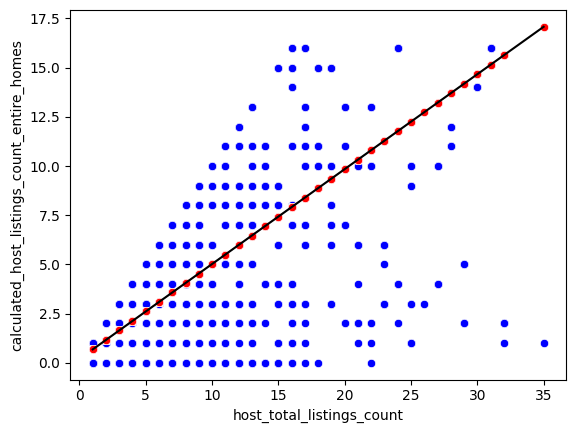

In [ ]:
sns.scatterplot(x='host_total_listings_count', y='calculated_host_listings_count_entire_homes', color='blue', data=df1)
sns.scatterplot(x='host_total_listings_count', y='predict_host_total_listings_count2', color='red', data=df1)
sns.lineplot(x='host_total_listings_count', y='predict_host_total_listings_count2', color='black', data=df1)

#####4.4.9 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.5678336409892693

#####4.4.10  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.7535473714301373

In [ ]:
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(coef_Deter)
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(coef_Correl)
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesMexico["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesMexico["calculated_host_listings_count_entire_homes vs host_total_listings_count"])

[0.5678336409892693, 0.7535473714301373, 0.4822030924963724, 0.19699760166357372]


#### 4.5 calculated_host_listings_count_entire_homes vs host_total_listings_count
#####4.5.1 Mostrar correlacion de los datos


<Axes: xlabel='availability_60', ylabel='availability_90'>

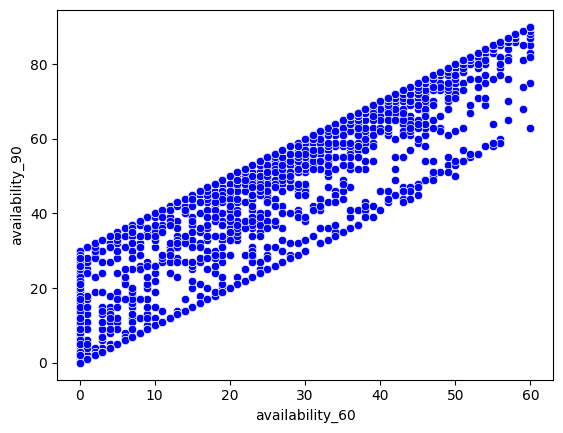

In [ ]:
sns.scatterplot(x="availability_60", y="availability_90", color="blue", data=df1)

#####4.5.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["availability_60"]]
Var_dep = df1[["availability_90"]]

#####4.5.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.5.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.5.5 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_60'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.37086516]]),
 'rank_': 1,
 'singular_': array([1537.03381858]),
 'intercept_': array([10.67974131])}

#####4.5.6 Modelo matematico, y = 1.37086516 + 10.67974131

In [ ]:
yPred = model.predict(X = df1[["availability_60"]])
yPred

array([[10.67974131],
       [76.48126879],
       [68.25607786],
       ...,
       [35.35531411],
       [84.70645973],
       [88.8190552 ]])

#####4.5.7 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_availability_60", yPred)
df1.head()

,predict_availability_60,predict_host_total_listings_count2,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,10.679741,3.090216,2.512609,1.501069,4.805348,1.0,0.95,2.0,6.0,650.0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,76.481269,1.643607,1.505774,2.586694,2.630431,1.0,1.00,2.0,3.0,1089.0,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,68.256078,6.947841,12.580965,14.528567,10.605129,1.0,1.00,13.0,14.0,943.0,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,12.050606,6.947841,10.567294,10.186068,10.605129,1.0,0.99,14.0,14.0,1200.0,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,53.176561,1.643607,1.505774,3.672318,2.630431,1.0,1.00,3.0,3.0,549.0,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


#####4.5.8 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='availability_60', ylabel='availability_90'>

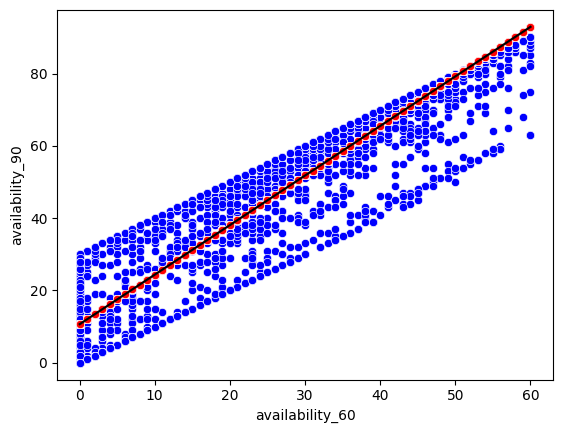

In [ ]:
sns.scatterplot(x='availability_60', y='availability_90', color='blue', data=df1)
sns.scatterplot(x='availability_60', y='predict_availability_60', color='red', data=df1)
sns.lineplot(x='availability_60', y='predict_availability_60', color='black', data=df1)

#####4.5.9 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.9278319611507538

#####4.5.10  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9632403444368149

In [ ]:
coeficientesMexico["availability_60 vs availability_90"].append(coef_Deter)
coeficientesMexico["availability_60 vs availability_90"].append(coef_Correl)
coeficientesMexico["availability_60 vs availability_90"].append(model.__dict__["coef_"][0][0])
coeficientesMexico["availability_60 vs availability_90"].append(model.__dict__["intercept_"][0])
print(coeficientesMexico["availability_60 vs availability_90"])

[0.9278319611507538, 0.9632403444368149, 1.3708651559791218, 10.679741306419494]


#### 4.6 calculated_host_listings_count_entire_homes vs host_total_listings_count
#####4.6.1 Mostrar correlacion de los datos


<Axes: xlabel='availability_30', ylabel='availability_60'>

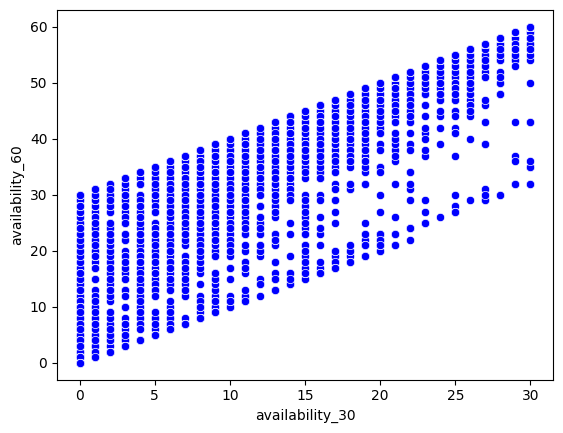

In [ ]:
sns.scatterplot(x="availability_30", y="availability_60", color="blue", data=df1)

#####4.5.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["availability_30"]]
Var_dep = df1[["availability_60"]]

#####4.5.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.5.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.5.5 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_30'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.69821347]]),
 'rank_': 1,
 'singular_': array([816.5486276]),
 'intercept_': array([11.54594279])}

#####4.5.6 Modelo matematico, y = 1.69821347 + 11.54594279

In [ ]:
yPred = model.predict(X = df1[["availability_30"]])
yPred

array([[11.54594279],
       [42.11378517],
       [54.00127942],
       ...,
       [18.33879665],
       [52.30306596],
       [57.39770635]])

#####4.5.7 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_availability_30", yPred)
df1.head()

,predict_availability_30,predict_availability_60,predict_host_total_listings_count2,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,11.545943,10.679741,3.090216,2.512609,1.501069,4.805348,1.0,0.95,2.0,6.0,...,15.0,0.0,4.88,4.94,4.75,1.0,1.0,0.0,0.0,0.58
7,42.113785,76.481269,1.643607,1.505774,2.586694,2.630431,1.0,1.00,2.0,3.0,...,6.0,0.0,4.90,4.95,4.94,2.0,0.0,2.0,0.0,0.94
8,54.001279,68.256078,6.947841,12.580965,14.528567,10.605129,1.0,1.00,13.0,14.0,...,3.0,1.0,4.75,4.75,4.88,13.0,11.0,2.0,0.0,0.15
20,13.244156,12.050606,6.947841,10.567294,10.186068,10.605129,1.0,0.99,14.0,14.0,...,10.0,0.0,4.84,4.96,4.89,9.0,9.0,0.0,0.0,0.77
24,30.226291,53.176561,1.643607,1.505774,3.672318,2.630431,1.0,1.00,3.0,3.0,...,3.0,2.0,5.00,5.00,5.00,3.0,0.0,3.0,0.0,0.04


#####4.5.8 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='availability_30', ylabel='availability_60'>

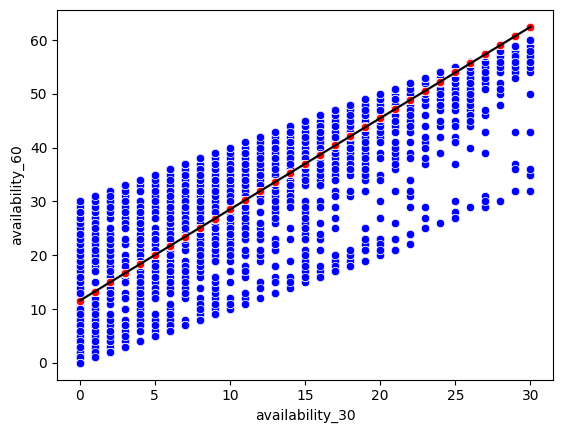

In [ ]:
sns.scatterplot(x='availability_30', y='availability_60', color='blue', data=df1)
sns.scatterplot(x='availability_30', y='predict_availability_30', color='red', data=df1)
sns.lineplot(x='availability_30', y='predict_availability_30', color='black', data=df1)

#####4.5.9 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.8139201872562312

#####4.5.10  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9021752530723901

In [ ]:
coeficientesMexico["availability_60 vs availability_30"].append(coef_Deter)
coeficientesMexico["availability_60 vs availability_30"].append(coef_Correl)
coeficientesMexico["availability_60 vs availability_30"].append(model.__dict__["coef_"][0][0])
coeficientesMexico["availability_60 vs availability_30"].append(model.__dict__["intercept_"][0])
print(coeficientesMexico["availability_60 vs availability_30"])

[0.8139201872562312, 0.9021752530723901, 1.6982134650604739, 11.545942794392626]


#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



# Regresion Lineal con Girona_Espana.csv

### 2. Cargar archivo

In [ ]:
df = pd.read_csv("Girona_Espana.csv", encoding="latin1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19655 non-null  float64
 1   listing_url                                   19655 non-null  object 
 2   scrape_id                                     19655 non-null  float64
 3   last_scraped                                  19655 non-null  object 
 4   source                                        19655 non-null  object 
 5   name                                          19655 non-null  object 
 6   description                                   19632 non-null  object 
 7   neighborhood_overview                         8342 non-null   object 
 8   picture_url                                   19655 non-null  object 
 9   host_id                                       19655 non-null 

In [ ]:
df1 = df.copy()
# Seleccionamos columnas a analizar
df1 = df1.iloc[:, [16, 17, 22, 23, 40, 41, 42, 51, 52, 53, 54, 56, 57, 58, 63, 65, 66, 70, 71, 72, 73, 74]]
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100%,90%,1.0,5.0,$42.00,1,1125,0,0,18,...,15,0,4.94,4.91,4.63,1,0,1,0,0.37
1,100%,42%,1.0,1.0,$47.00,2,30,9,39,69,...,2,0,4.85,4.91,4.69,1,0,1,0,0.51
2,100%,80%,2.0,3.0,$74.00,2,30,23,47,77,...,4,0,4.31,4.76,4.74,2,2,0,0,0.62
3,100%,91%,6.0,6.0,$45.00,2,21,23,44,65,...,3,0,4.50,5.00,4.63,6,1,5,0,0.08
4,NaN,0%,2.0,3.0,$120.00,7,32,0,0,0,...,0,0,4.82,4.73,4.91,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,93%,100%,34.0,44.0,$209.00,1,365,0,0,29,...,0,0,NaN,NaN,NaN,34,34,0,0,NaN
19651,100%,100%,3.0,3.0,$52.00,3,365,30,60,90,...,0,0,NaN,NaN,NaN,1,1,0,0,NaN
19652,43%,50%,9.0,11.0,$66.00,7,60,29,59,89,...,0,0,NaN,NaN,NaN,9,9,0,0,NaN
19653,93%,99%,111.0,121.0,$108.00,1,365,28,58,88,...,0,0,NaN,NaN,NaN,54,54,0,0,NaN


### 3. Limpieza del DF y Outliers

#### 3.1 Verificamos info del DF

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19655 entries, 0 to 19654
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            17567 non-null  object 
 1   host_acceptance_rate                          18502 non-null  object 
 2   host_listings_count                           19538 non-null  float64
 3   host_total_listings_count                     19538 non-null  float64
 4   price                                         19655 non-null  object 
 5   minimum_nights                                19655 non-null  int64  
 6   maximum_nights                                19655 non-null  int64  
 7   availability_30                               19655 non-null  int64  
 8   availability_60                               19655 non-null  int64  
 9   availability_90                               19655 non-null 

In [ ]:
# Convertimos todas las columnas a tipo float
df1['price'] = pd.to_numeric(df1['price'].str.replace('[\$,]', '', regex=True), errors='coerce')
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.rstrip('%').astype(float) / 100
df1['host_response_rate'] = df1['host_response_rate'].str.rstrip('%').astype(float) / 100

display(df1)


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.00,0.90,1.0,5.0,42.0,1,1125,0,0,18,...,15,0,4.94,4.91,4.63,1,0,1,0,0.37
1,1.00,0.42,1.0,1.0,47.0,2,30,9,39,69,...,2,0,4.85,4.91,4.69,1,0,1,0,0.51
2,1.00,0.80,2.0,3.0,74.0,2,30,23,47,77,...,4,0,4.31,4.76,4.74,2,2,0,0,0.62
3,1.00,0.91,6.0,6.0,45.0,2,21,23,44,65,...,3,0,4.50,5.00,4.63,6,1,5,0,0.08
4,NaN,0.00,2.0,3.0,120.0,7,32,0,0,0,...,0,0,4.82,4.73,4.91,1,1,0,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,0.93,1.00,34.0,44.0,209.0,1,365,0,0,29,...,0,0,NaN,NaN,NaN,34,34,0,0,NaN
19651,1.00,1.00,3.0,3.0,52.0,3,365,30,60,90,...,0,0,NaN,NaN,NaN,1,1,0,0,NaN
19652,0.43,0.50,9.0,11.0,66.0,7,60,29,59,89,...,0,0,NaN,NaN,NaN,9,9,0,0,NaN
19653,0.93,0.99,111.0,121.0,108.0,1,365,28,58,88,...,0,0,NaN,NaN,NaN,54,54,0,0,NaN


#### 3.2 Verificar la existencia valores nulos

In [ ]:
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              2088
host_acceptance_rate                            1153
host_listings_count                              117
host_total_listings_count                        117
price                                              0
minimum_nights                                     0
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                  0
number_of_reviews_ltm                              0
number_of_reviews_l30d                             0
review_scores_cleanliness                       5283
review_scores_communication                     5285
review_scores_location                          5284
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes   

#### 3.3 Eliminar valores nulos en el DF

In [ ]:
df1 = df1.dropna()
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,0.90,1.0,5.0,42.0,1,1125,0,0,18,...,15,0,4.94,4.91,4.63,1,0,1,0,0.37
1,1.0,0.42,1.0,1.0,47.0,2,30,9,39,69,...,2,0,4.85,4.91,4.69,1,0,1,0,0.51
2,1.0,0.80,2.0,3.0,74.0,2,30,23,47,77,...,4,0,4.31,4.76,4.74,2,2,0,0,0.62
3,1.0,0.91,6.0,6.0,45.0,2,21,23,44,65,...,3,0,4.50,5.00,4.63,6,1,5,0,0.08
5,1.0,1.00,12.0,12.0,105.0,2,180,12,30,47,...,9,0,4.69,4.45,4.79,12,12,0,0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19046,1.0,0.99,2.0,2.0,59.0,1,365,28,58,78,...,1,1,5.00,5.00,5.00,2,1,1,0,1.00
19077,1.0,1.00,2.0,2.0,39.0,2,4,26,56,86,...,1,1,5.00,5.00,5.00,2,0,2,0,1.00
19202,1.0,1.00,1.0,3.0,80.0,4,29,14,14,43,...,3,3,5.00,5.00,5.00,1,1,0,0,3.00
19283,1.0,0.80,1.0,2.0,39.0,1,1125,24,54,84,...,1,1,4.00,4.00,4.00,1,0,1,0,1.00


In [ ]:
# Corroboramos valores nulos
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_cleanliness                       0
review_scores_communication                     0
review_scores_location                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0


#### 3.4 Mostrar la distribucion de valores atipicos

<Figure size 1500x800 with 0 Axes>

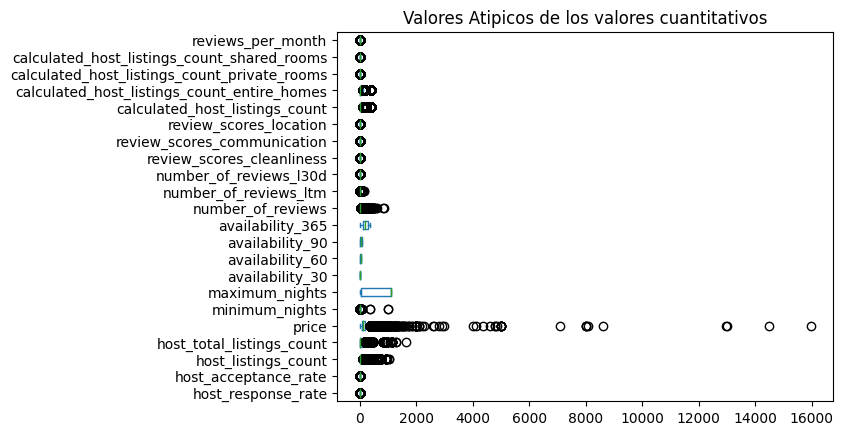

In [ ]:
fig = plt.figure(figsize = (15, 8))
df1.plot(kind='box', vert=False)
plt.title('Valores Atipicos de los valores cuantitativos')
plt.show()

#### 3.5 Metodo de Cuantiles

In [ ]:
# Encontramos los valores extremos
y = df1

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5 * iqr
limiteInferiorIQR = percentile25 - 1.5 * iqr


print(f"Limite superior permitido :")
for col, val in limiteSuperiorIQR.items():
    print(f"{col}: {round(val, 2)}")

print(f"\n\nLimite inferior permitido :")
for col, val in limiteInferiorIQR.items():
    print(f"{col}: {round(val, 2)}")

Limite superior permitido :
host_response_rate: 1.04
host_acceptance_rate: 1.15
host_listings_count: 128.5
host_total_listings_count: 179.5
price: 351.0
minimum_nights: 8.5
maximum_nights: 2722.5
availability_30: 63.5
availability_60: 112.5
availability_90: 159.0
availability_365: 546.0
number_of_reviews: 50.5
number_of_reviews_ltm: 16.0
number_of_reviews_l30d: 0.0
review_scores_cleanliness: 5.93
review_scores_communication: 5.5
review_scores_location: 5.52
calculated_host_listings_count: 118.5
calculated_host_listings_count_entire_homes: 118.5
calculated_host_listings_count_private_rooms: 0.0
calculated_host_listings_count_shared_rooms: 0.0
reviews_per_month: 1.46


Limite inferior permitido :
host_response_rate: 0.92
host_acceptance_rate: 0.75
host_listings_count: -75.5
host_total_listings_count: -104.5
price: -73.0
minimum_nights: -3.5
maximum_nights: -1537.5
availability_30: -36.5
availability_60: -43.5
availability_90: -49.0
availability_365: -150.0
number_of_reviews: -25.5
number

####3.6 Encontrar los Outliers

In [ ]:
# Encontramos Outliers
outliers = df1[(y>limiteSuperiorIQR) | (y<limiteInferiorIQR)]
print(f"\nOutliers:\n")
for col, val in outliers.items():
    print(f"{col}: {round(val, 2)}")


Outliers:

host_response_rate: 0       NaN
1       NaN
2       NaN
3       NaN
5       NaN
         ..
19046   NaN
19077   NaN
19202   NaN
19283   NaN
19467   NaN
Name: host_response_rate, Length: 12945, dtype: float64
host_acceptance_rate: 0         NaN
1        0.42
2         NaN
3         NaN
5         NaN
         ... 
19046     NaN
19077     NaN
19202     NaN
19283     NaN
19467     NaN
Name: host_acceptance_rate, Length: 12945, dtype: float64
host_listings_count: 0       NaN
1       NaN
2       NaN
3       NaN
5       NaN
         ..
19046   NaN
19077   NaN
19202   NaN
19283   NaN
19467   NaN
Name: host_listings_count, Length: 12945, dtype: float64
host_total_listings_count: 0       NaN
1       NaN
2       NaN
3       NaN
5       NaN
         ..
19046   NaN
19077   NaN
19202   NaN
19283   NaN
19467   NaN
Name: host_total_listings_count, Length: 12945, dtype: float64
price: 0       NaN
1       NaN
2       NaN
3       NaN
5       NaN
         ..
19046   NaN
19077   NaN
19202   NaN

#### 3.7 Convertir Outliers en nulos

In [ ]:
df1 = df1[(y<=limiteSuperiorIQR) & (y>=limiteInferiorIQR)]
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,0.90,1.0,5.0,42.0,1.0,1125,0,0,18,...,15.0,0.0,4.94,4.91,4.63,1.0,0.0,NaN,0.0,0.37
1,1.0,NaN,1.0,1.0,47.0,2.0,30,9,39,69,...,2.0,0.0,4.85,4.91,4.69,1.0,0.0,NaN,0.0,0.51
2,1.0,0.80,2.0,3.0,74.0,2.0,30,23,47,77,...,4.0,0.0,4.31,4.76,4.74,2.0,2.0,0.0,0.0,0.62
3,1.0,0.91,6.0,6.0,45.0,2.0,21,23,44,65,...,3.0,0.0,4.50,5.00,4.63,6.0,1.0,NaN,0.0,0.08
5,1.0,1.00,12.0,12.0,105.0,2.0,180,12,30,47,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19046,1.0,0.99,2.0,2.0,59.0,1.0,365,28,58,78,...,1.0,NaN,5.00,5.00,5.00,2.0,1.0,NaN,0.0,1.00
19077,1.0,1.00,2.0,2.0,39.0,2.0,4,26,56,86,...,1.0,NaN,5.00,5.00,5.00,2.0,0.0,NaN,0.0,1.00
19202,1.0,1.00,1.0,3.0,80.0,4.0,29,14,14,43,...,3.0,NaN,5.00,5.00,5.00,1.0,1.0,0.0,0.0,NaN
19283,1.0,0.80,1.0,2.0,39.0,1.0,1125,24,54,84,...,1.0,NaN,4.00,NaN,NaN,1.0,0.0,NaN,0.0,1.00


In [ ]:
# Corroboramos valores nulos
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              2133
host_acceptance_rate                            1504
host_listings_count                             1228
host_total_listings_count                       1567
price                                           1163
minimum_nights                                   156
maximum_nights                                     0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                               1417
number_of_reviews_ltm                           1203
number_of_reviews_l30d                          1558
review_scores_cleanliness                        649
review_scores_communication                     1386
review_scores_location                          1085
calculated_host_listings_count                   969
calculated_host_listings_count_entire_homes   

####3.8 Eliminamos todos los registros nulos

In [ ]:
#df1 = df1.fillna(round(df1.mean(), 1))
df1 = df1.dropna()
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,1.00,1.00,12.0,12.0,105.0,2.0,180,12,30,47,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,1.00,1.00,12.0,12.0,110.0,2.0,180,26,56,86,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,1.00,0.80,1.0,2.0,120.0,7.0,120,0,0,1,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.00,0.91,1.0,1.0,114.0,4.0,1125,24,50,64,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,0.98,0.91,127.0,133.0,150.0,2.0,1125,29,56,86,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18329,1.00,0.98,25.0,26.0,61.0,1.0,1125,7,37,61,...,1.0,0.0,4.00,5.00,5.00,24.0,24.0,0.0,0.0,0.70
18372,1.00,0.98,52.0,56.0,69.0,1.0,1125,17,44,74,...,2.0,0.0,4.50,5.00,5.00,35.0,35.0,0.0,0.0,1.28
18379,1.00,0.94,34.0,51.0,101.0,2.0,183,26,56,86,...,1.0,0.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.63
18457,1.00,1.00,1.0,1.0,45.0,2.0,365,19,49,79,...,1.0,0.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.91


In [ ]:
# Corroboramos valores nulos
valores_nulos = df1.isnull().sum()
print(valores_nulos)

host_response_rate                              0
host_acceptance_rate                            0
host_listings_count                             0
host_total_listings_count                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_cleanliness                       0
review_scores_communication                     0
review_scores_location                          0
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0


####3.9 Graficar el comportamiento de los valores atipicos



<Figure size 1500x800 with 0 Axes>

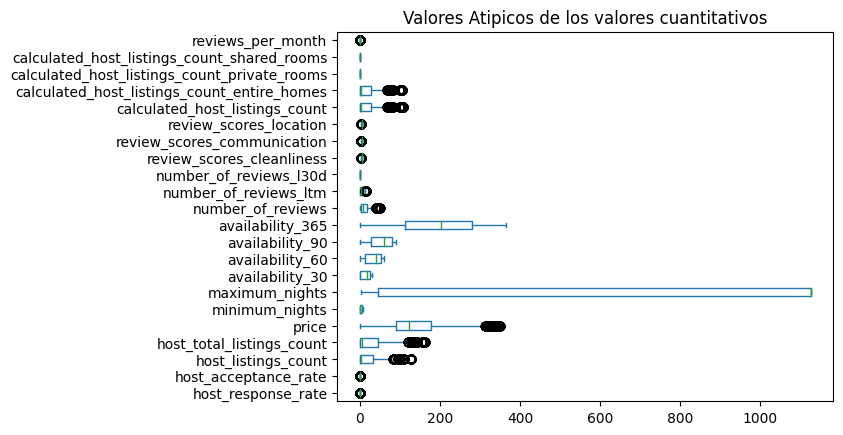

In [ ]:
# Corroboramos con boxplot la nueva distribucion de los valores atipicos
fig = plt.figure(figsize = (15, 8))
df1.plot(kind='box', vert=False)
plt.title('Valores Atipicos de los valores cuantitativos')
plt.show()

In [ ]:
display(df1)

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,1.00,1.00,12.0,12.0,105.0,2.0,180,12,30,47,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,1.00,1.00,12.0,12.0,110.0,2.0,180,26,56,86,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,1.00,0.80,1.0,2.0,120.0,7.0,120,0,0,1,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.00,0.91,1.0,1.0,114.0,4.0,1125,24,50,64,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,0.98,0.91,127.0,133.0,150.0,2.0,1125,29,56,86,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18329,1.00,0.98,25.0,26.0,61.0,1.0,1125,7,37,61,...,1.0,0.0,4.00,5.00,5.00,24.0,24.0,0.0,0.0,0.70
18372,1.00,0.98,52.0,56.0,69.0,1.0,1125,17,44,74,...,2.0,0.0,4.50,5.00,5.00,35.0,35.0,0.0,0.0,1.28
18379,1.00,0.94,34.0,51.0,101.0,2.0,183,26,56,86,...,1.0,0.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.63
18457,1.00,1.00,1.0,1.0,45.0,2.0,365,19,49,79,...,1.0,0.0,5.00,5.00,5.00,1.0,1.0,0.0,0.0,0.91


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4478 entries, 5 to 18707
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            4478 non-null   float64
 1   host_acceptance_rate                          4478 non-null   float64
 2   host_listings_count                           4478 non-null   float64
 3   host_total_listings_count                     4478 non-null   float64
 4   price                                         4478 non-null   float64
 5   minimum_nights                                4478 non-null   float64
 6   maximum_nights                                4478 non-null   int64  
 7   availability_30                               4478 non-null   int64  
 8   availability_60                               4478 non-null   int64  
 9   availability_90                               4478 non-null   

### 4. Regresión lineal simple

Es posible calcular las correlaciones de todas las variables o columnas de manera inmediata para definir cuales son las mejores relaciones existentes

Primero muestro mis columnas existentes para revisar que todo este bien (tipo de datos)

In [ ]:
df1.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,1.00,1.00,12.0,12.0,105.0,2.0,180,12,30,47,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,1.00,1.00,12.0,12.0,110.0,2.0,180,26,56,86,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,1.00,0.80,1.0,2.0,120.0,7.0,120,0,0,1,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.00,0.91,1.0,1.0,114.0,4.0,1125,24,50,64,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,0.98,0.91,127.0,133.0,150.0,2.0,1125,29,56,86,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


Al generar las correlaciones de is variables puedo observar algunos casos en los que las variables muestran NaN, es decir, que no existe una correlacion de algun tipo entre ambas variables, si no que son completamente ajenas.

En este caso no se puede tratar de un error por tipo de datos, ya que las variables con valores que no eran numericos fueron tratadas con anterioridad.

En base a la tabla de correlaciones elegiré 6 pares que cuenten con un R alto con el que pueda mostrar los modelos de regresion lineal de manera efectiva.

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df1.corr()
Corr_Factors

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_response_rate,1.000000,0.070574,-0.400834,-0.437061,0.021248,0.165217,-0.127347,-0.003191,0.019034,0.030324,...,0.114316,NaN,0.108190,0.154555,0.048587,-0.351045,-0.351334,NaN,NaN,0.135515
host_acceptance_rate,0.070574,1.000000,0.039697,0.057088,0.034120,-0.105747,0.013802,-0.023385,-0.025793,-0.023112,...,0.004616,NaN,0.017052,0.003934,0.001352,0.030720,0.031984,NaN,NaN,0.055713
host_listings_count,-0.400834,0.039697,1.000000,0.946225,0.017305,-0.350524,0.280946,-0.109437,-0.111488,-0.116741,...,-0.284924,NaN,-0.139821,-0.179136,-0.010974,0.975188,0.974474,NaN,NaN,-0.310635
host_total_listings_count,-0.437061,0.057088,0.946225,1.000000,0.022706,-0.371703,0.312078,-0.129102,-0.129579,-0.135825,...,-0.292143,NaN,-0.162041,-0.178775,-0.019135,0.930733,0.932036,NaN,NaN,-0.323056
price,0.021248,0.034120,0.017305,0.022706,1.000000,-0.043598,-0.015039,0.034356,0.010955,0.002507,...,-0.086137,NaN,0.061995,0.038897,0.059056,0.004043,0.003079,NaN,NaN,-0.092391
minimum_nights,0.165217,-0.105747,-0.350524,-0.371703,-0.043598,1.000000,-0.155158,-0.084638,-0.092447,-0.093570,...,-0.028566,NaN,0.005990,0.112884,-0.013314,-0.342231,-0.342474,NaN,NaN,-0.095082
maximum_nights,-0.127347,0.013802,0.280946,0.312078,-0.015039,-0.155158,1.000000,-0.060732,-0.063183,-0.069758,...,-0.113372,NaN,-0.131388,-0.110776,-0.033660,0.283771,0.285573,NaN,NaN,-0.168637
availability_30,-0.003191,-0.023385,-0.109437,-0.129102,0.034356,-0.084638,-0.060732,1.000000,0.934333,0.874094,...,0.110807,NaN,0.013795,-0.029777,-0.016654,-0.123114,-0.125116,NaN,NaN,0.106080
availability_60,0.019034,-0.025793,-0.111488,-0.129579,0.010955,-0.092447,-0.063183,0.934333,1.000000,0.956773,...,0.119951,NaN,0.017173,-0.021114,-0.007025,-0.123466,-0.125360,NaN,NaN,0.115725
availability_90,0.030324,-0.023112,-0.116741,-0.135825,0.002507,-0.093570,-0.069758,0.874094,0.956773,1.000000,...,0.120365,NaN,0.018947,-0.019967,-0.010825,-0.130994,-0.132930,NaN,NaN,0.122075


###Creamos un diccionario donde almacenaremos los valores para el coeficiente de correlacion y determinacion de cada modelo obtenido para DF_Mexico.csv



In [ ]:
coeficientesEspana = {
    'host_total_listings_count vs host_listings_count': [],
    'calculated_host_listings_count vs host_listings_count': [],
    'calculated_host_listings_count_entire_homes vs host_listings_count': [],
    'calculated_host_listings_count_entire_homes vs host_total_listings_count': [],
    'availability_60 vs availability_90': [],
    'availability_60 vs availability_30': []
}

#### 4.1 host_total_listings_count vs host_listings_count
#####4.1.1 Mostrar correlacion de los datos


<Axes: xlabel='host_total_listings_count', ylabel='host_listings_count'>

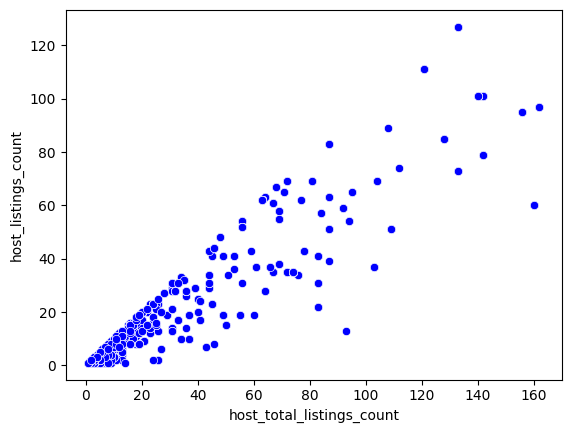

In [ ]:
sns.scatterplot(x="host_total_listings_count", y="host_listings_count", color="blue", data=df1)

#####4.1.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["host_total_listings_count"]]
Var_dep = df1[["host_listings_count"]]

#####4.1.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.1.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.1.3 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.66589442]]),
 'rank_': 1,
 'singular_': array([2868.10043584]),
 'intercept_': array([1.27873941])}

#####4.1.4 Modelo matematico, y = 0.72497255 + 0.45551317

In [ ]:
yPred = model.predict(X = df1[["host_total_listings_count"]])
yPred

array([[ 9.2694724 ],
       [ 9.2694724 ],
       [ 2.61052825],
       ...,
       [35.23935463],
       [ 1.94463383],
       [ 2.61052825]])

#####4.1.5 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_host_total_listings_count", yPred)
df1.head()

,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,availability_60,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,9.269472,1.00,1.00,12.0,12.0,105.0,2.0,180,12,30,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,9.269472,1.00,1.00,12.0,12.0,110.0,2.0,180,26,56,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,2.610528,1.00,0.80,1.0,2.0,120.0,7.0,120,0,0,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.944634,1.00,0.91,1.0,1.0,114.0,4.0,1125,24,50,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,89.842697,0.98,0.91,127.0,133.0,150.0,2.0,1125,29,56,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


#####4.1.6 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='host_total_listings_count', ylabel='host_listings_count'>

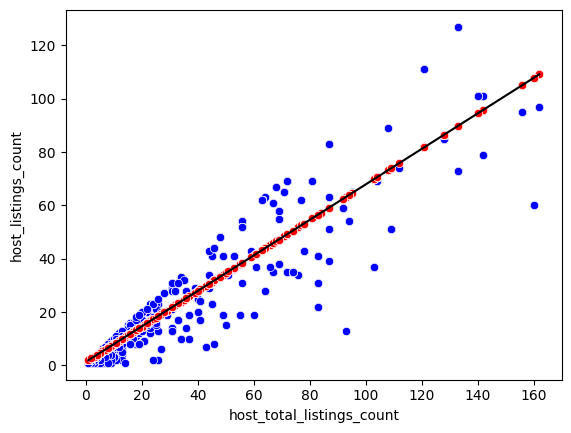

In [ ]:
sns.scatterplot(x='host_total_listings_count', y='host_listings_count', color='blue', data=df1)
sns.scatterplot(x='host_total_listings_count', y='predict_host_total_listings_count', color='red', data=df1)
sns.lineplot(x='host_total_listings_count', y='predict_host_total_listings_count', color='black', data=df1)

#####4.1.7 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.8953421785868445

####4.1.8  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9462252261416647

In [ ]:
coeficientesEspana["host_total_listings_count vs host_listings_count"].append(coef_Deter)
coeficientesEspana["host_total_listings_count vs host_listings_count"].append(coef_Correl)
coeficientesEspana["host_total_listings_count vs host_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesEspana["host_total_listings_count vs host_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesEspana["host_total_listings_count vs host_listings_count"])

[0.8953421785868445, 0.9462252261416647, 0.6658944159428373, 1.2787394131251908]


#### 4.2 calculated_host_listings_count vs host_listings_count
#####4.2.1 Mostrar correlacion de los datos


<Axes: xlabel='calculated_host_listings_count', ylabel='host_listings_count'>

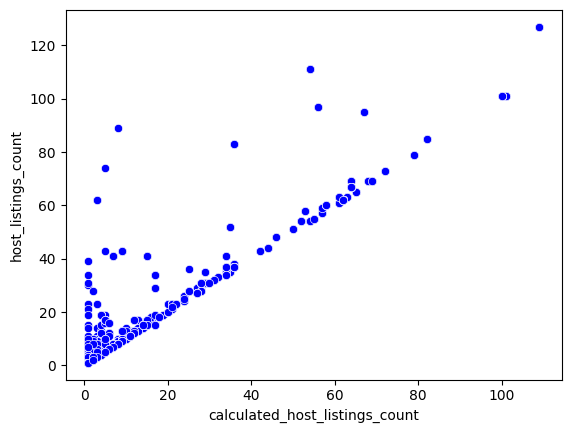

In [ ]:
sns.scatterplot(x="calculated_host_listings_count", y="host_listings_count", color="blue", data=df1)

#####4.2.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["calculated_host_listings_count"]]
Var_dep = df1[["host_listings_count"]]

#####4.2.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.2.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.2.3 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.07937978]]),
 'rank_': 1,
 'singular_': array([1823.55602202]),
 'intercept_': array([0.60402561])}

#####4.2.4 Modelo matematico, y = 1.08562486 + 0.41544383

In [ ]:
yPred = model.predict(X = df1[["calculated_host_listings_count"]])
yPred

array([[13.55658292],
       [13.55658292],
       [ 1.68340538],
       ...,
       [ 1.68340538],
       [ 1.68340538],
       [ 2.76278516]])

#####4.2.5 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_calculated_host_listings_count", yPred)
df1.head()

,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,availability_30,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,13.556583,9.269472,1.00,1.00,12.0,12.0,105.0,2.0,180,12,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,13.556583,9.269472,1.00,1.00,12.0,12.0,110.0,2.0,180,26,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,1.683405,2.610528,1.00,0.80,1.0,2.0,120.0,7.0,120,0,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.683405,1.944634,1.00,0.91,1.0,1.0,114.0,4.0,1125,24,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,118.256421,89.842697,0.98,0.91,127.0,133.0,150.0,2.0,1125,29,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


#####4.2.6 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='calculated_host_listings_count', ylabel='host_listings_count'>

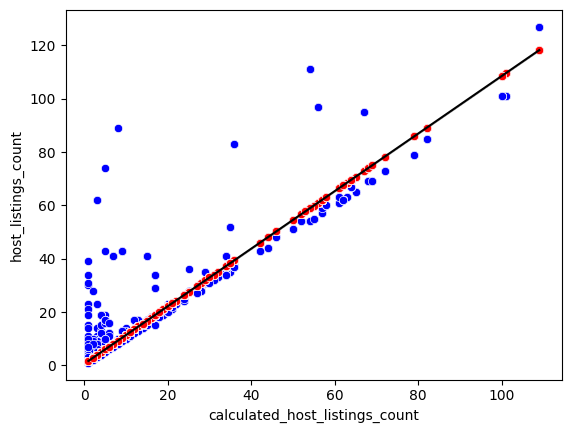

In [ ]:
sns.scatterplot(x='calculated_host_listings_count', y='host_listings_count', color='blue', data=df1)
sns.scatterplot(x='calculated_host_listings_count', y='predict_calculated_host_listings_count', color='red', data=df1)
sns.lineplot(x='calculated_host_listings_count', y='predict_calculated_host_listings_count', color='black', data=df1)

#####4.2.7 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.9509908975059019

####4.2.8  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9751876216943599

In [ ]:
coeficientesEspana["calculated_host_listings_count vs host_listings_count"].append(coef_Deter)
coeficientesEspana["calculated_host_listings_count vs host_listings_count"].append(coef_Correl)
coeficientesEspana["calculated_host_listings_count vs host_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesEspana["calculated_host_listings_count vs host_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesEspana["calculated_host_listings_count vs host_listings_count"])

[0.9509908975059019, 0.9751876216943599, 1.0793797759010182, 0.6040256055714615]


#### 4.3 calculated_host_listings_count_entire_homes vs host_listings_count
#####4.3.1 Mostrar correlacion de los datos


<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='host_listings_count'>

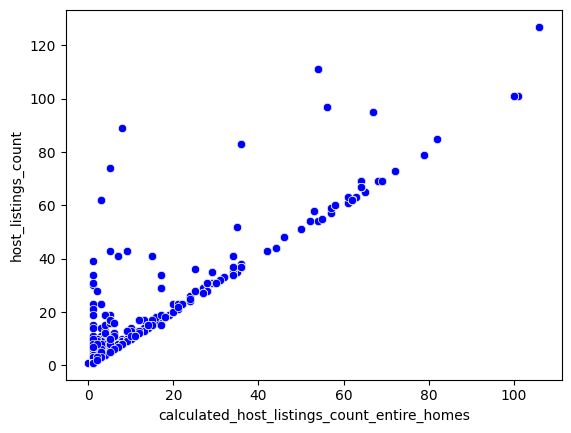

In [ ]:
sns.scatterplot(x="calculated_host_listings_count_entire_homes", y="host_listings_count", color="blue", data=df1)

#####4.3.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["calculated_host_listings_count_entire_homes"]]
Var_dep = df1[["host_listings_count"]]

#####4.3.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.3.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.3.3 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['calculated_host_listings_count_entire_homes'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.08555541]]),
 'rank_': 1,
 'singular_': array([1811.85589174]),
 'intercept_': array([0.56138116])}

#####4.3.4 Modelo matematico, y = 1.00683553 + 1.50577373

In [ ]:
yPred = model.predict(X = df1[["calculated_host_listings_count_entire_homes"]])
yPred

array([[13.58804604],
       [13.58804604],
       [ 1.64693656],
       ...,
       [ 1.64693656],
       [ 1.64693656],
       [ 2.73249197]])

#####4.3.5 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_calculated_host_listings_count_entire_homes", yPred)
df1.head()

,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,105.0,2.0,180,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,110.0,2.0,180,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,1.646937,1.683405,2.610528,1.00,0.80,1.0,2.0,120.0,7.0,120,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.646937,1.683405,1.944634,1.00,0.91,1.0,1.0,114.0,4.0,1125,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,115.630254,118.256421,89.842697,0.98,0.91,127.0,133.0,150.0,2.0,1125,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


#####4.3.6 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='host_listings_count'>

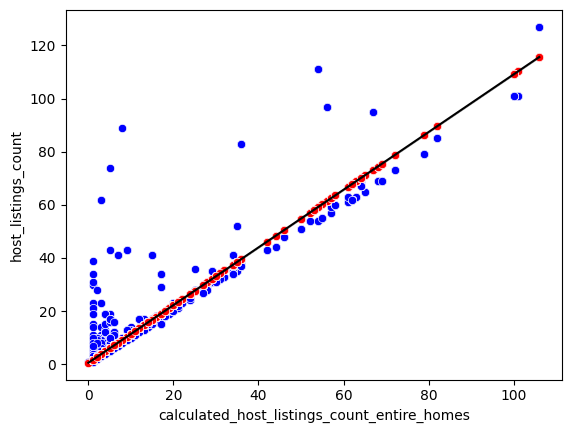

In [ ]:
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='host_listings_count', color='blue', data=df1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='predict_calculated_host_listings_count_entire_homes', color='red', data=df1)
sns.lineplot(x='calculated_host_listings_count_entire_homes', y='predict_calculated_host_listings_count_entire_homes', color='black', data=df1)

#####4.3.7 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.9496003851953668

####4.3.8  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9744744148490339

In [ ]:
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_listings_count"].append(coef_Deter)
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_listings_count"].append(coef_Correl)
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesEspana["calculated_host_listings_count_entire_homes vs host_listings_count"])

[0.9496003851953668, 0.9744744148490339, 1.085555407240706, 0.5613811564211879]


#### 4.4 host_total_listings_count vs calculated_host_listings_count_entire_homes
#####4.4.1 Mostrar correlacion de los datos


<Axes: xlabel='host_total_listings_count', ylabel='calculated_host_listings_count_entire_homes'>

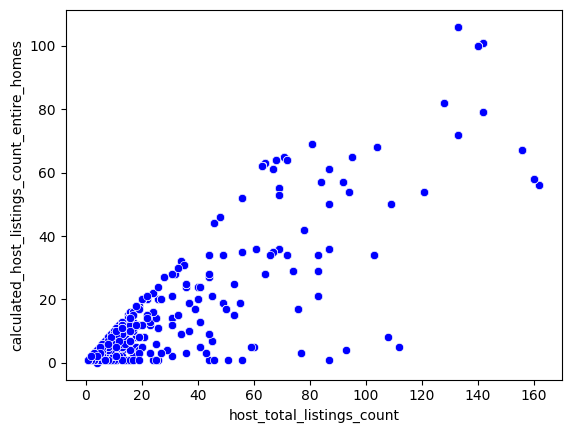

In [ ]:
sns.scatterplot(x="host_total_listings_count", y="calculated_host_listings_count_entire_homes", color="blue", data=df1)

#####4.4.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["host_total_listings_count"]]
Var_dep = df1[["calculated_host_listings_count_entire_homes"]]

#####4.4.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.4.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.4.5 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_total_listings_count'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.58879196]]),
 'rank_': 1,
 'singular_': array([2868.10043584]),
 'intercept_': array([1.39556041])}

#####4.4.6 Modelo matematico, y = 0.48220309 + 0.1969976

In [ ]:
yPred = model.predict(X = df1[["host_total_listings_count"]])
yPred

array([[ 8.4610639 ],
       [ 8.4610639 ],
       [ 2.57314432],
       ...,
       [31.42395024],
       [ 1.98435237],
       [ 2.57314432]])

#####4.4.7 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_host_total_listings_count2", yPred)
df1.head()

,predict_host_total_listings_count2,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,minimum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,8.461064,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,105.0,2.0,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,8.461064,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,110.0,2.0,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,2.573144,1.646937,1.683405,2.610528,1.00,0.80,1.0,2.0,120.0,7.0,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,1.984352,1.646937,1.683405,1.944634,1.00,0.91,1.0,1.0,114.0,4.0,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,79.704891,115.630254,118.256421,89.842697,0.98,0.91,127.0,133.0,150.0,2.0,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


#####4.4.8 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='host_total_listings_count', ylabel='calculated_host_listings_count_entire_homes'>

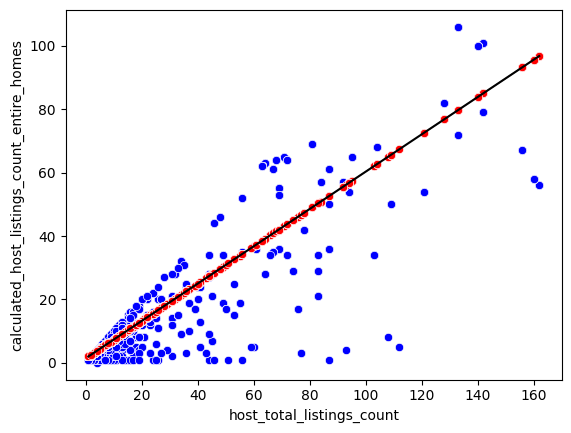

In [ ]:
sns.scatterplot(x='host_total_listings_count', y='calculated_host_listings_count_entire_homes', color='blue', data=df1)
sns.scatterplot(x='host_total_listings_count', y='predict_host_total_listings_count2', color='red', data=df1)
sns.lineplot(x='host_total_listings_count', y='predict_host_total_listings_count2', color='black', data=df1)

#####4.4.9 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.8686906444032366

#####4.4.10  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9320357527494515

In [ ]:
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(coef_Deter)
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(coef_Correl)
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(model.__dict__["coef_"][0][0])
coeficientesEspana["calculated_host_listings_count_entire_homes vs host_total_listings_count"].append(model.__dict__["intercept_"][0])
print(coeficientesEspana["calculated_host_listings_count_entire_homes vs host_total_listings_count"])

[0.8686906444032366, 0.9320357527494515, 0.5887919575021918, 1.3955604088744096]


#### 4.5 calculated_host_listings_count_entire_homes vs host_total_listings_count
#####4.5.1 Mostrar correlacion de los datos


<Axes: xlabel='availability_60', ylabel='availability_90'>

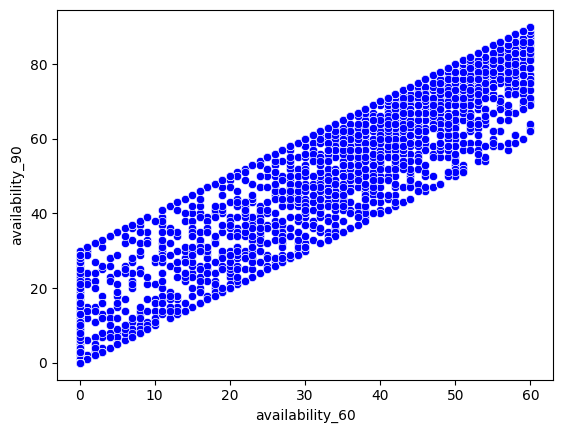

In [ ]:
sns.scatterplot(x="availability_60", y="availability_90", color="blue", data=df1)

#####4.5.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["availability_60"]]
Var_dep = df1[["availability_90"]]

#####4.5.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.5.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.5.5 Obtenemos diccionario del modelo

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_60'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.31407152]]),
 'rank_': 1,
 'singular_': array([1468.76360648]),
 'intercept_': array([8.56199654])}

#####4.5.6 Modelo matematico, y = 1.37086516 + 10.67974131

In [ ]:
yPred = model.predict(X = df1[["availability_60"]])
yPred

array([[47.98414207],
       [82.15000154],
       [ 8.56199654],
       ...,
       [82.15000154],
       [72.95150091],
       [51.92635663]])

#####4.5.7 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_availability_60", yPred)
df1.head()

,predict_availability_60,predict_host_total_listings_count2,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,price,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,47.984142,8.461064,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,105.0,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,82.150002,8.461064,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,110.0,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,8.561997,2.573144,1.646937,1.683405,2.610528,1.00,0.80,1.0,2.0,120.0,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,74.265572,1.984352,1.646937,1.683405,1.944634,1.00,0.91,1.0,1.0,114.0,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,82.150002,79.704891,115.630254,118.256421,89.842697,0.98,0.91,127.0,133.0,150.0,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


#####4.5.8 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='availability_60', ylabel='availability_90'>

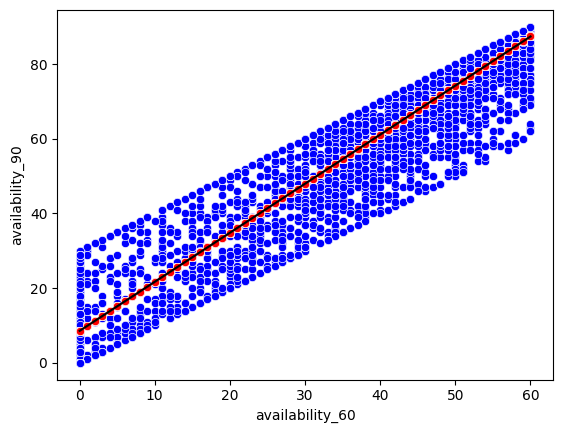

In [ ]:
sns.scatterplot(x='availability_60', y='availability_90', color='blue', data=df1)
sns.scatterplot(x='availability_60', y='predict_availability_60', color='red', data=df1)
sns.lineplot(x='availability_60', y='predict_availability_60', color='black', data=df1)

#####4.5.9 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.9154145123718016

#####4.5.10  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9567729680398593

In [ ]:
coeficientesEspana["availability_60 vs availability_90"].append(coef_Deter)
coeficientesEspana["availability_60 vs availability_90"].append(coef_Correl)
coeficientesEspana["availability_60 vs availability_90"].append(model.__dict__["coef_"][0][0])
coeficientesEspana["availability_60 vs availability_90"].append(model.__dict__["intercept_"][0])
print(coeficientesEspana["availability_60 vs availability_90"])

[0.9154145123718016, 0.9567729680398593, 1.3140715177808913, 8.561996540738186]


#### 4.6 calculated_host_listings_count_entire_homes vs host_total_listings_count
#####4.6.1 Mostrar correlacion de los datos


<Axes: xlabel='availability_30', ylabel='availability_60'>

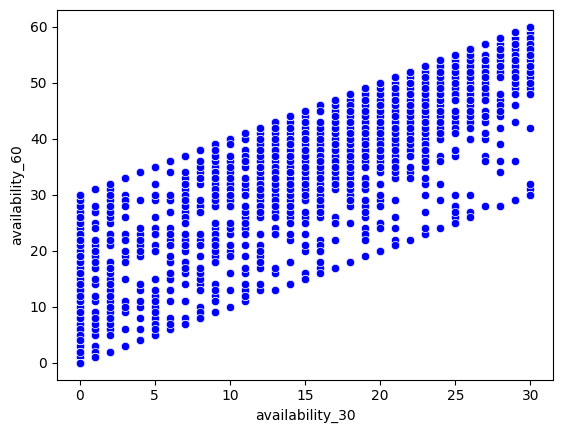

In [ ]:
sns.scatterplot(x="availability_30", y="availability_60", color="blue", data=df1)

#####4.5.2 Variables dependientes e independientes

In [ ]:
Vars_indep = df1[["availability_30"]]
Var_dep = df1[["availability_60"]]

#####4.5.3 Modelo de Regresion Lineal

In [ ]:
#Libreria para cargar el modelo de regresion
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

#####4.5.4 Ajustamos el modelo con las variables

In [ ]:
model.fit(X = Vars_indep, y = Var_dep)

LinearRegression()

#####4.5.5 Obtenemos diccionario del modelo

In [ ]:
print(model.__dict__["coef_"][0][0])
model.__dict__

1.7958882730872185


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_30'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.79588827]]),
 'rank_': 1,
 'singular_': array([764.14243649]),
 'intercept_': array([7.02500491])}

#####4.5.6 Modelo matematico, y = 1.69821347 + 11.54594279

In [ ]:
yPred = model.predict(X = df1[["availability_30"]])
yPred

array([[28.57566419],
       [53.71810001],
       [ 7.02500491],
       ...,
       [53.71810001],
       [41.1468821 ],
       [30.37155246]])

#####4.5.7 Insertar prediccion al DF inicial

In [ ]:
df1.insert(0, "predict_availability_30", yPred)
df1.head()

,predict_availability_30,predict_availability_60,predict_host_total_listings_count2,predict_calculated_host_listings_count_entire_homes,predict_calculated_host_listings_count,predict_host_total_listings_count,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_cleanliness,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,28.575664,47.984142,8.461064,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,...,9.0,0.0,4.69,4.45,4.79,12.0,12.0,0.0,0.0,0.34
6,53.718100,82.150002,8.461064,13.588046,13.556583,9.269472,1.00,1.00,12.0,12.0,...,0.0,0.0,4.79,4.50,4.50,12.0,12.0,0.0,0.0,0.13
11,7.025005,8.561997,2.573144,1.646937,1.683405,2.610528,1.00,0.80,1.0,2.0,...,3.0,0.0,4.88,4.97,4.70,1.0,1.0,0.0,0.0,0.24
14,50.126323,74.265572,1.984352,1.646937,1.683405,1.944634,1.00,0.91,1.0,1.0,...,6.0,0.0,4.79,4.96,4.93,1.0,1.0,0.0,0.0,0.47
16,59.105765,82.150002,79.704891,115.630254,118.256421,89.842697,0.98,0.91,127.0,133.0,...,1.0,0.0,4.00,4.65,4.90,109.0,106.0,0.0,0.0,0.18


#####4.5.8 Visualizamos grafica comparativa entre lo real y lo predecido

<Axes: xlabel='availability_30', ylabel='availability_60'>

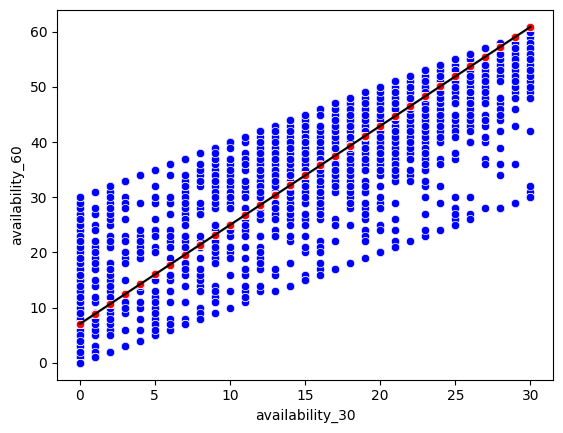

In [ ]:
sns.scatterplot(x='availability_30', y='availability_60', color='blue', data=df1)
sns.scatterplot(x='availability_30', y='predict_availability_30', color='red', data=df1)
sns.lineplot(x='availability_30', y='predict_availability_30', color='black', data=df1)

#####4.5.9 Obtenemos el coeficiente de determinacion del modelo

In [ ]:
#Obtener el coeficiente de determinancion del modelo
coef_Deter = model.score(X = Vars_indep, y = Var_dep)
coef_Deter

0.8729783252813709

#####4.5.10  Obtenemos el coeficiente de correlacion del modelo

In [ ]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.9343330911839582

In [ ]:
coeficientesEspana["availability_60 vs availability_30"].append(coef_Deter)
coeficientesEspana["availability_60 vs availability_30"].append(coef_Correl)
coeficientesEspana["availability_60 vs availability_30"].append(model.__dict__["coef_"][0][0])
coeficientesEspana["availability_60 vs availability_30"].append(model.__dict__["intercept_"][0])
print(coeficientesEspana["availability_60 vs availability_30"])

[0.8729783252813709, 0.9343330911839582, 1.7958882730872185, 7.025004911874735]


-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------

###5. Mejores modelos matematicos

Para decicir cual era el mejor modelo matematico para cada uno de los 6 pares de cada ciudad, nos basamos en el coeficiente de crrelación, esto derivado de que el coeficiente de determinación era muy parecido en todos los casos, por lo que basarse en la correlacion es lo más atinado de momento.

Finalmente al contar con los coeficientes de cada pareja en un diccionario, es posible tomar el valor maximo y relacionarlo con el modelo matemico con mejor rendimiento.

Finalmente solo se muestra la pareja con mejor rendimiento y su modelo matematico.

In [ ]:
def llave_con_segundo_max(diccionario):
    llave_max = None
    segundo_max_valor = float('-inf')

    for llave, arreglo in diccionario.items():
        if len(arreglo) >= 2:
            segundo_elemento = arreglo[1]
            if segundo_elemento > segundo_max_valor:
                segundo_max_valor = segundo_elemento
                llave_max = llave

    return llave_max


resultado = llave_con_segundo_max(coeficientesMexico)
print(f"{MAGENTA}Para Mexico{RESET}")
print(f"La llave con el segundo elemento más grande es: {CIAN}{resultado}{RESET}\nEl modelo es: {VERDE}y = {coeficientesMexico[resultado][2]} + {coeficientesMexico[resultado][3]}{RESET}\n" )

resultado = llave_con_segundo_max(coeficientesEspana)
print(f"{MAGENTA}Para España{RESET}")
print(f"La llave con el segundo elemento más grande es: {CIAN}{resultado}{RESET}\nEl modelo es: {VERDE}y = {coeficientesEspana[resultado][2]} + {coeficientesEspana[resultado][3]}{RESET}\n" )


Para Mexico
La llave con el segundo elemento más grande es: availability_60 vs availability_90
El modelo es: y = 1.3708651559791218 + 10.679741306419494

Para España
La llave con el segundo elemento más grande es: calculated_host_listings_count vs host_listings_count
El modelo es: y = 1.0793797759010182 + 0.6040256055714615



###6. Coeficientes de determinación y correlación

Al observar con detenimiento los resultados obtenidos, pudimos denotar que España cuenta con mejores resultados de correlacion y determinacion en cada uno de los modelos para cada cuarto.

Lo que a grandes rasgos demuestra que el modelo de regresión lineal simple esta más adaptado a los datos de España.

Conocer estos datos nos permite tomar mejores deciciones y por ejemplo en este punto particular tartar de aplicar modelos matematicos diferentes que se puedan ir adaptando mejor a los datos y el escenario.

In [ ]:
def tabla(diccionario1, diccionario2):

  llavesdic1 = list(diccionario1.keys())
  llavesdic2 = list(diccionario2.keys())

  for i, llave in enumerate(diccionario1):
    coef_det1, coef_corr1 = diccionario1[llave][:2]
    coef_det2, coef_corr2 = diccionario2[llave][:2]

    print(f"{VERDE}{llavesdic1[i]}{RESET}")
    print(f"{MAGENTA}Mexico{RESET}")
    print(f"{AZUL}Coef_det.                 Coef_corr{RESET}")
    print(f"{coef_det1}        {coef_corr1}")
    print(f"{MAGENTA}España{RESET}")
    print(f"{AZUL}Coef_det.                 Coef_corr{RESET}")
    print(f"{coef_det2}        {coef_corr2}\n")

tabla(coeficientesMexico, coeficientesEspana)

host_total_listings_count vs host_listings_count
Mexico
Coef_det.                 Coef_corr
0.8363880365123116        0.9145425285421732
España
Coef_det.                 Coef_corr
0.8953421785868445        0.9462252261416647

calculated_host_listings_count vs host_listings_count
Mexico
Coef_det.                 Coef_corr
0.7708831650085042        0.8779995244921857
España
Coef_det.                 Coef_corr
0.9509908975059019        0.9751876216943599

calculated_host_listings_count_entire_homes vs host_listings_count
Mexico
Coef_det.                 Coef_corr
0.6605726936143884        0.8127562325903065
España
Coef_det.                 Coef_corr
0.9496003851953668        0.9744744148490339

calculated_host_listings_count_entire_homes vs host_total_listings_count
Mexico
Coef_det.                 Coef_corr
0.5678336409892693        0.7535473714301373
España
Coef_det.                 Coef_corr
0.8686906444032366        0.9320357527494515

availability_60 vs availability_90
Mexico
Coef_de